The idea is that because I don't find all loci that I thought I should find (opposite homozygous loci in the parental straint), I wanted to see whether any given AF data fits other hypothetical crosses of the strains I handled better. It seems so far that this is always the case, by a bit, but not crazily, so maybe the intepretation should consist of whether other crosses fit *much* better.

````bash

bcftools view -s YJNRC2 -e 'type!="snp"' TRD.vcf.gz | bcftools view -i "MAX(FMT/AD) != FMT/DP & FMT/DP >= 10" | bcftools query -f "%CHROM\t%POS\t%REF,%ALT\t[%AD]\n" | gzip > YJNRC2.hetLoci.gz


samples=`cat TRD.vcf.gz.samples`

for s in $samples; do bcftools view -s $s -e 'type!="snp"' TRD.vcf.gz | bcftools view -i "FMT/GT == 'hom' & FMT/GQ >= 30 & FMT/DP >= 30" | bcftools query -f "%CHROM\t%POS\t%REF,%ALT\t[%GT]\n" | gzip > $s.homLoci.gz; echo $s; done

````

In [75]:
source("../../BrusselSprouts/scripts/functions.R")

In [76]:
hetLoci=fread("~/data/trd/mapped_reads/YJNRC17.hetLoci.gz")
colnames(hetLoci)=c("chr","pos","alleles","ADcross")
head(hetLoci)

,chr,pos,alleles,ADcross
,<chr>,<int>,<chr>,<chr>
1,chromosome1,184,"C,G,A","1,20,0"
2,chromosome1,305,"C,G","2,19"
3,chromosome1,328,"C,T,G","18,2,0"
4,chromosome1,472,"C,T,A","24,21,0"
5,chromosome1,510,"A,C,T,G","150,43,25,0"
6,chromosome1,523,"T,C","155,101"


In [77]:
OH_files=list.files("~/data/trd/mapped_reads", pattern = "homLoci.gz$", full.names = TRUE)
OH_files

[1] "/home/jnrunge/data/trd/mapped_reads/AAM.homLoci.gz"     
 [2] "/home/jnrunge/data/trd/mapped_reads/AAR.homLoci.gz"     
 [3] "/home/jnrunge/data/trd/mapped_reads/ABA.homLoci.gz"     
 [4] "/home/jnrunge/data/trd/mapped_reads/ABC.homLoci.gz"     
 [5] "/home/jnrunge/data/trd/mapped_reads/ABE.homLoci.gz"     
 [6] "/home/jnrunge/data/trd/mapped_reads/ABG.homLoci.gz"     
 [7] "/home/jnrunge/data/trd/mapped_reads/ABL.homLoci.gz"     
 [8] "/home/jnrunge/data/trd/mapped_reads/ABP.homLoci.gz"     
 [9] "/home/jnrunge/data/trd/mapped_reads/ABS.homLoci.gz"     
[10] "/home/jnrunge/data/trd/mapped_reads/ACI.homLoci.gz"     
[11] "/home/jnrunge/data/trd/mapped_reads/ACK.homLoci.gz"     
[12] "/home/jnrunge/data/trd/mapped_reads/ACN.homLoci.gz"     
[13] "/home/jnrunge/data/trd/mapped_reads/ACP.homLoci.gz"     
[14] "/home/jnrunge/data/trd/mapped_reads/ACT.homLoci.gz"     
[15] "/home/jnrunge/data/trd/mapped_reads/ACV.homLoci.gz"     
[16] "/home/jnrunge/data/trd/mapped_reads/AKE.homLoci.gz"     
[17] "/home/jnrunge/data/trd/mapped_reads/AKH.homLoci.gz"     
[18] "/home/jnrunge/data/trd/mapped_reads/AKI.homLoci.gz"     
[19] "/home/jnrunge/data/trd/mapped_reads/AKQ.homLoci.gz"     
[20] "/home/jnrunge/data/trd/mapped_reads/AKS.homLoci.gz"     
[21] "/home/jnrunge/data/trd/mapped_reads/AKV.homLoci.gz"     
[22] "/home/jnrunge/data/trd/mapped_reads/AMD.homLoci.gz"     
[23] "/home/jnrunge/data/trd/mapped_reads/AMM.homLoci.gz"     
[24] "/home/jnrunge/data/trd/mapped_reads/AND.homLoci.gz"     
[25] "/home/jnrunge/data/trd/mapped_reads/ANG.homLoci.gz"     
[26] "/home/jnrunge/data/trd/mapped_reads/ANH.homLoci.gz"     
[27] "/home/jnrunge/data/trd/mapped_reads/ANI.homLoci.gz"     
[28] "/home/jnrunge/data/trd/mapped_reads/ATE.homLoci.gz"     
[29] "/home/jnrunge/data/trd/mapped_reads/AVI.homLoci.gz"     
[30] "/home/jnrunge/data/trd/mapped_reads/BAH.homLoci.gz"     
[31] "/home/jnrunge/data/trd/mapped_reads/BAK.homLoci.gz"     
[32] "/home/jnrunge/data/trd/mapped_reads/BAN.homLoci.gz"     
[33] "/home/jnrunge/data/trd/mapped_reads/BAP.homLoci.gz"     
[34] "/home/jnrunge/data/trd/mapped_reads/BEF.homLoci.gz"     
[35] "/home/jnrunge/data/trd/mapped_reads/BET.homLoci.gz"     
[36] "/home/jnrunge/data/trd/mapped_reads/BFC.homLoci.gz"     
[37] "/home/jnrunge/data/trd/mapped_reads/BFD.homLoci.gz"     
[38] "/home/jnrunge/data/trd/mapped_reads/BFP.homLoci.gz"     
[39] "/home/jnrunge/data/trd/mapped_reads/BFQ.homLoci.gz"     
[40] "/home/jnrunge/data/trd/mapped_reads/BFR.homLoci.gz"     
[41] "/home/jnrunge/data/trd/mapped_reads/BHN.homLoci.gz"     
[42] "/home/jnrunge/data/trd/mapped_reads/BID.homLoci.gz"     
[43] "/home/jnrunge/data/trd/mapped_reads/BKL.homLoci.gz"     
[44] "/home/jnrunge/data/trd/mapped_reads/BMK.homLoci.gz"     
[45] "/home/jnrunge/data/trd/mapped_reads/BQC.homLoci.gz"     
[46] "/home/jnrunge/data/trd/mapped_reads/BTI.homLoci.gz"     
[47] "/home/jnrunge/data/trd/mapped_reads/CCC.homLoci.gz"     
[48] "/home/jnrunge/data/trd/mapped_reads/CCD.homLoci.gz"     
[49] "/home/jnrunge/data/trd/mapped_reads/CCF.homLoci.gz"     
[50] "/home/jnrunge/data/trd/mapped_reads/CCG.homLoci.gz"     
[51] "/home/jnrunge/data/trd/mapped_reads/CEI.homLoci.gz"     
[52] "/home/jnrunge/data/trd/mapped_reads/CGD.homLoci.gz"     
[53] "/home/jnrunge/data/trd/mapped_reads/CMP.homLoci.gz"     
[54] "/home/jnrunge/data/trd/mapped_reads/CMQ.homLoci.gz"     
[55] "/home/jnrunge/data/trd/mapped_reads/CPG.homLoci.gz"     
[56] "/home/jnrunge/data/trd/mapped_reads/CRB.homLoci.gz"     
[57] "/home/jnrunge/data/trd/mapped_reads/SACE_YCR.homLoci.gz"
[58] "/home/jnrunge/data/trd/mapped_reads/YJNRC2.homLoci.gz"

In [78]:
OH_files=subset(OH_files, !grepl("YJNRC", OH_files, fixed=TRUE))

In [79]:
areTheRightAllelesPresentInCross=function(x){
    alleles=strsplit(OH_vs_cross$ADcross[x], ",", fixed=TRUE)[[1]]
    return(as.numeric(alleles[as.numeric(substr(OH_vs_cross$GT1[x],1,1))+1]) > 0 & 
          as.numeric(alleles[as.numeric(substr(OH_vs_cross$GT2[x],1,1))+1]) > 0)
}

In [80]:
head(hetLoci)
hetLoci$DPcross=NA
for(i in 1:nrow(hetLoci)){
    hetLoci$DPcross[i]=sum(as.numeric(strsplit(hetLoci$ADcross[i], ",", fixed=TRUE)[[1]]))
}

,chr,pos,alleles,ADcross
,<chr>,<int>,<chr>,<chr>
1,chromosome1,184,"C,G,A","1,20,0"
2,chromosome1,305,"C,G","2,19"
3,chromosome1,328,"C,T,G","18,2,0"
4,chromosome1,472,"C,T,A","24,21,0"
5,chromosome1,510,"A,C,T,G","150,43,25,0"
6,chromosome1,523,"T,C","155,101"


In [81]:
head(hetLoci)

,chr,pos,alleles,ADcross,DPcross
,<chr>,<int>,<chr>,<chr>,<dbl>
1,chromosome1,184,"C,G,A","1,20,0",21
2,chromosome1,305,"C,G","2,19",21
3,chromosome1,328,"C,T,G","18,2,0",20
4,chromosome1,472,"C,T,A","24,21,0",45
5,chromosome1,510,"A,C,T,G","150,43,25,0",218
6,chromosome1,523,"T,C","155,101",256


In [82]:
hetLoci=subset(hetLoci, DPcross <= quantile(DPcross, 0.95))
nrow(hetLoci)

[1] 96274

In [83]:
df_fit=expand.grid(file1=1:length(OH_files), file2=1:length(OH_files), loci1=NA, loci2=NA, loci12=NA, loci123=NA, countLociFit=NA)
df_fit=subset(df_fit, file1!=file2 & file2 > file1)
head(df_fit)
nrow(df_fit)
for(i in 1:nrow(df_fit)){
    i1=df_fit$file1[i]
    i2=df_fit$file2[i]
    OH1=fread(OH_files[i1])
    df_fit$loci1[i]=nrow(OH1)
    OH2=fread(OH_files[i2])
    df_fit$loci2[i]=nrow(OH2)
    colnames(OH1)=c("chr","pos","alleles","GT1")
    colnames(OH2)=c("chr","pos","alleles","GT2")
    OH=full_join(OH1,OH2, by=c("chr","pos","alleles"))
    
    OH=subset(OH, !is.na(GT1) & !is.na(GT2))
    OH=subset(OH, substr(GT1,1,1) == substr(GT1,3,3))
    OH=subset(OH, substr(GT2,1,1) == substr(GT2,3,3))
    OH=subset(OH, substr(GT1,1,1) != substr(GT2,1,1))
    
    df_fit$loci12[i]=nrow(OH)
    
    OH_vs_cross=full_join(OH, hetLoci, by=c("chr","pos","alleles"))

    if(sum(duplicated(OH_vs_cross[,c(1,2)]))>0){
        stop()
    }
    OH_vs_cross=subset(OH_vs_cross, !is.na(ADcross) & !is.na(GT1) & !is.na(GT2))
    df_fit$loci123[i]=nrow(OH_vs_cross) 
      if(nrow(OH_vs_cross)==0){
          df_fit$countLociFit[i]=0
          next
      } 
    OH_vs_cross=OH_vs_cross[unlist(lapply(1:nrow(OH_vs_cross),areTheRightAllelesPresentInCross)),]
    df_fit$countLociFit[i]=nrow(OH_vs_cross)
}

,file1,file2,loci1,loci2,loci12,loci123,countLociFit
,<int>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
58,1,2,NA,NA,NA,NA,NA
115,1,3,NA,NA,NA,NA,NA
116,2,3,NA,NA,NA,NA,NA
172,1,4,NA,NA,NA,NA,NA
173,2,4,NA,NA,NA,NA,NA
174,3,4,NA,NA,NA,NA,NA


[1] 1596

In [84]:
OH_files[i1]
OH_files[i2]

[1] "/home/jnrunge/data/trd/mapped_reads/CRB.homLoci.gz"

[1] "/home/jnrunge/data/trd/mapped_reads/SACE_YCR.homLoci.gz"

In [85]:
head(df_fit)

,file1,file2,loci1,loci2,loci12,loci123,countLociFit
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
58,1,2,589161,590041,40831,11287,11019
115,1,3,589161,595535,52236,16031,15698
116,2,3,590041,595535,50049,14847,14510
172,1,4,589161,596259,54740,17286,16902
173,2,4,590041,596259,55549,17935,17550
174,3,4,595535,596259,50653,16210,15840


In [86]:
crossExpec=df_fit$countLociFit[df_fit$file1==which(grepl("AVI",OH_files,fixed=TRUE)) & 
                              df_fit$file2==which(grepl("BET",OH_files,fixed=TRUE))]
crossExpec

[1] 42091

In [87]:
df_fit$fracLociFit=df_fit$countLociFit/df_fit$loci12
summary(df_fit$fracLociFit)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2072  0.2893  0.2829  0.3388  0.6648 

In [88]:
crossExpecFrac=df_fit$fracLociFit[df_fit$file1==which(grepl("AVI",OH_files,fixed=TRUE)) & 
                              df_fit$file2==which(grepl("BET",OH_files,fixed=TRUE))]
crossExpecFrac

[1] 0.603585

In [89]:
head(df_fit[order(df_fit$fracLociFit, decreasing = TRUE),])

,file1,file2,loci1,loci2,loci12,loci123,countLociFit,fracLociFit
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
2138,29,38,594498,595408,64424,43107,42828,0.6647833
2133,24,38,596639,595408,64549,43119,42836,0.6636199
2134,25,38,595995,595408,64559,43110,42828,0.6633932
2135,26,38,595924,595408,64537,43097,42813,0.6633869
2136,27,38,597039,595408,64584,43119,42835,0.6632448
2195,29,39,594498,588621,69664,42811,42462,0.6095257


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


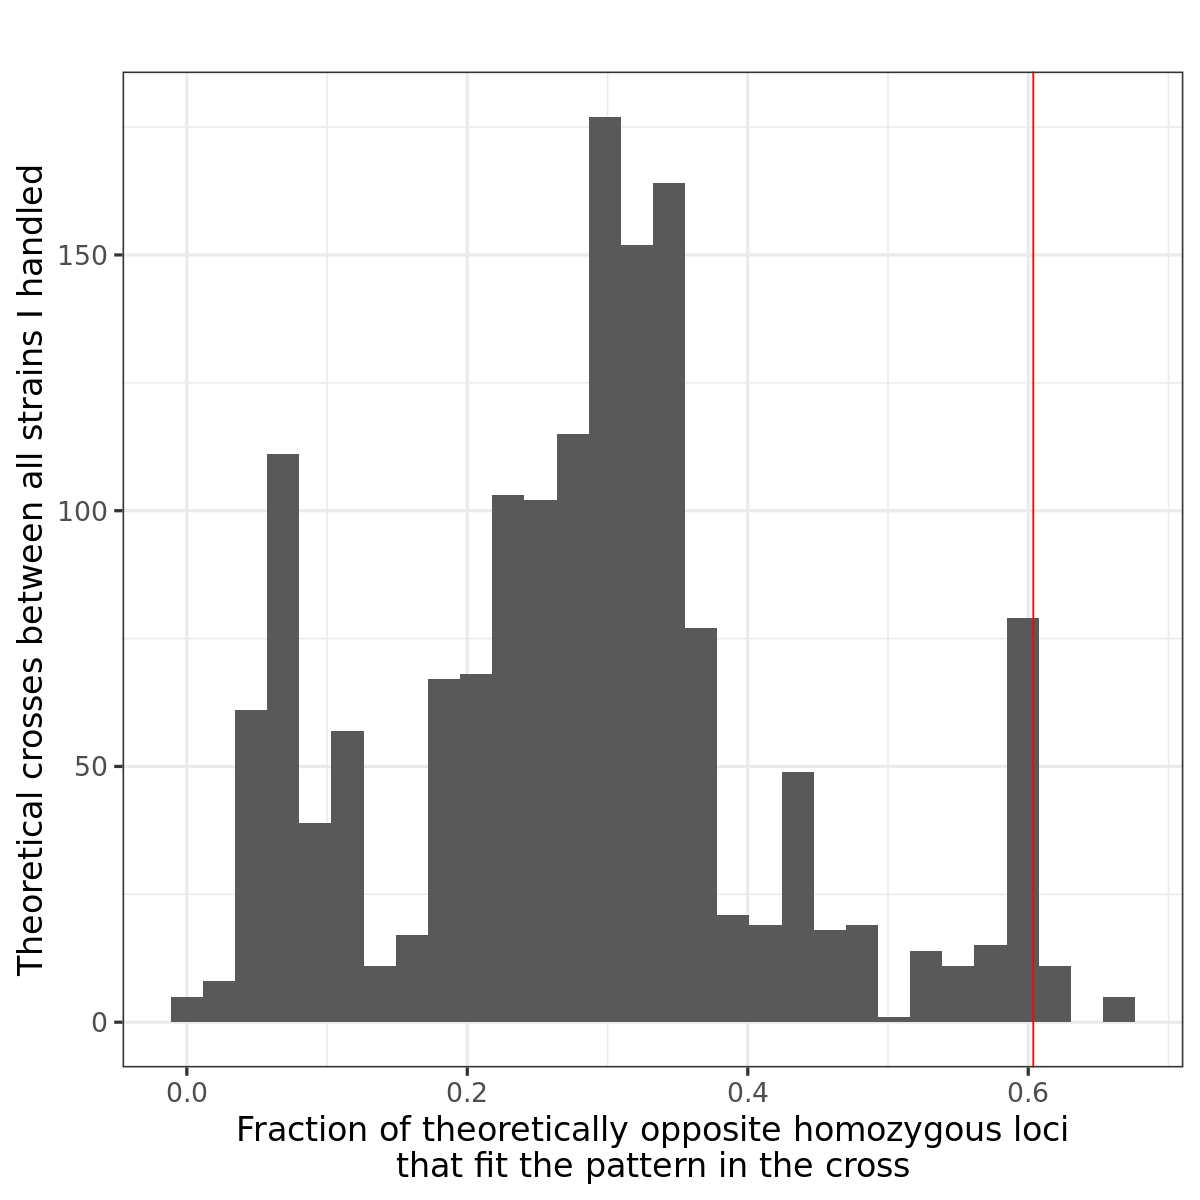

In [91]:
ggplot(df_fit, aes(fracLociFit))+
geom_histogram()+geom_vline(xintercept = crossExpecFrac, color="red")+
theme_bw(20)+xlab("Fraction of theoretically opposite homozygous loci\nthat fit the pattern in the cross")+
ylab("Theoretical crosses between all strains I handled")+
ggtitle("")